# I. Mirror number classification
### 1) MLP (multilayer perceptron) network

*Based on: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/*

Here we implement our first ML model for the basic task of classifying the number of mirrors in the system, based on the interference pattern. We start with a simple deep neural network - an MLP - which consists of several fully connected layers. 

In [1]:
# necessary imports

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt

The input data is in the form of a CSV file, where each row has numbers separated by commas. The first value signifies the number of mirrors present in the system; subsequent numbers are the values of total transmittance for equally spaced wavenumbers k. The number of k values is constant through all the rows and depends on the generated data - the more k values, the more dense the probing of the k-space.

Let us load the dataset and visualize some interference pattern.

In [2]:
dataset = loadtxt('data50.csv', delimiter=',', skiprows=1)

# number of k samples
k_samples = 50

# mirror numbers (the correct classes) in the first column
y = dataset[:,0]

# convenient to have the classes starting from 0, so just subtract 3 from every y
y -= 3

# transmittance values
X = dataset[:,1:]

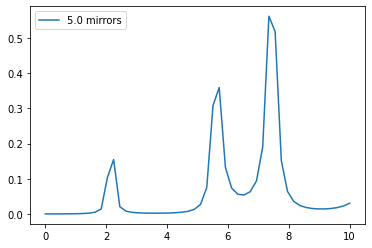

In [3]:
# k-space for plotting
kmin = 0
kmax = 10
ks = np.linspace(kmin, kmax, k_samples)

which_row = 10000

plt.figure()
plt.plot(ks, X[which_row], label=f'{y[which_row]+3} mirrors')
plt.legend(loc='best')
plt.show()

We will now split the dataset randomly into the training and test parts, borrowing a function from the scikit-learn package.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, 
                                                    test_size = 0.25)

# the 'stratify = y' argument ensures that the training and testing sets contain the same proportion of each class
# we especially need to watch out for this for the lowest number of mirrors 
# which forms a tiny proportion of the whole dataset:

print('Proportion of 3-mirror elements in the testing set:', list(y_test).count(0) / len(y_test))
print('Proportion of 3-mirror elements in the testing set:', list(y_train).count(0) / len(y_train))

Proportion of 3-mirror elements in the testing set: 0.0018492804028186927
Proportion of 3-mirror elements in the testing set: 0.00184928440263788


Checks out. Let us build the network now (with the sizes of hidden layers chosen arbitrarily).

In [5]:
# Define the model
model = Sequential()
model.add(Dense(24, input_dim=k_samples, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# The last layer consists of 8 nodes as we generated the data for 3 to 10 mirrors.

Now we compile it.

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

Set necessary prerequisites and train, using the testing data for validation.

In [7]:
epochs = 100
batch_size = 10

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
46235/46235 [==============================] - 43s 912us/step - loss: 1.0592 - sparse_categorical_accuracy: 0.5285 - val_loss: 0.8833 - val_sparse_categorical_accuracy: 0.6073
Epoch 2/100
46235/46235 [==============================] - 43s 922us/step - loss: 0.7698 - sparse_categorical_accuracy: 0.6674 - val_loss: 0.6621 - val_sparse_categorical_accuracy: 0.7167
Epoch 3/100
46235/46235 [==============================] - 42s 919us/step - loss: 0.6058 - sparse_categorical_accuracy: 0.7425 - val_loss: 0.5347 - val_sparse_categorical_accuracy: 0.7741
Epoch 4/100
46235/46235 [==============================] - 42s 914us/step - loss: 0.4989 - sparse_categorical_accuracy: 0.7921 - val_loss: 0.4988 - val_sparse_categorical_accuracy: 0.7934
Epoch 5/100
46235/46235 [==============================] - 42s 908us/step - loss: 0.4260 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.3971 - val_sparse_categorical_accuracy: 0.8360
Epoch 6/100
46235/46235 [==============================] - 4

46235/46235 [==============================] - 39s 837us/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.0715 - val_sparse_categorical_accuracy: 0.9750
Epoch 41/100
46235/46235 [==============================] - 37s 807us/step - loss: 0.0865 - sparse_categorical_accuracy: 0.9673 - val_loss: 0.1134 - val_sparse_categorical_accuracy: 0.9568
Epoch 42/100
46235/46235 [==============================] - 41s 882us/step - loss: 0.0850 - sparse_categorical_accuracy: 0.9680 - val_loss: 0.1044 - val_sparse_categorical_accuracy: 0.9609
Epoch 43/100
46235/46235 [==============================] - 56s 1ms/step - loss: 0.0837 - sparse_categorical_accuracy: 0.9680 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9739
Epoch 44/100
46235/46235 [==============================] - 64s 1ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9693 - val_loss: 0.1087 - val_sparse_categorical_accuracy: 0.9588
Epoch 45/100
46235/46235 [==============================] - 66s 1ms/step

46235/46235 [==============================] - 52s 1ms/step - loss: 0.0501 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0322 - val_sparse_categorical_accuracy: 0.9883 - ETA: 2s - loss: 0.0503 - sparse_categorical_accurac - ETA: 2s - loss: 0.0503 - sp - ETA: 0s - loss: 0.0501 - sparse_categorical_accuracy
Epoch 77/100
46235/46235 [==============================] - 109s 2ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0422 - val_sparse_categorical_accuracy: 0.9858
Epoch 78/100
46235/46235 [==============================] - 115s 2ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0341 - val_sparse_categorical_accuracy: 0.9877
Epoch 79/100
46235/46235 [==============================] - 104s 2ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0382 - val_sparse_categorical_accuracy: 0.9863
Epoch 80/100
46235/46235 [==============================] - 104s 2ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9

Now let's evaluate the best of the trained models.

In [8]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

4817/4817 [==============================] - 3s 530us/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9918
Test accuracy 0.9917917847633362
Test loss 0.027158737182617188


And plot the history of training.

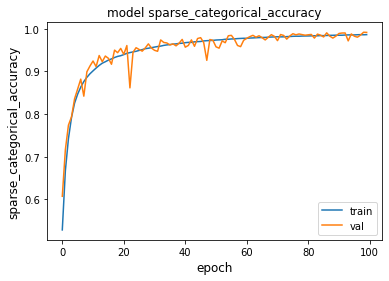

In [9]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()